### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [367]:
data = pd.read_csv('data/coupons.csv')

In [368]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [369]:
print(data.columns)
print(data.info())

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender    

In [370]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

### Data Transform: Convert age to numeric values
Since dataset consists of automobile drivers, we assume all ages are greater than or equal to 18.

In [371]:
def convert_age(str):
    if str == 'below21':
        return '18'
    elif '21' == str:
        return '21'
    elif '26' == str:
        return '26'
    elif '31' == str:
        return '31'
    elif '36' == str:
        return '36'
    elif '41' == str:
        return '41'
    elif '46' == str:
        return '46'
    else:
        # 50plus
        return '55'
    
#convert age column values to above strings... 
data['age'] = data['age'].apply(lambda x : convert_age(x))
data['age'] = pd.to_numeric(data['age'])
data['age'].value_counts()

age
21    2653
26    2559
31    2039
55    1788
36    1319
41    1093
46     686
18     547
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [372]:
print(data['CarryAway'].value_counts())
print(data['car'].value_counts())


CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


### Cleanup 1
#### 'CaryAway': 
Convert null values to 'never'
#### 'car': 
Convert null values to 'sedan' <br>
Convert 'Mazda5' to 'crossover' <br>
Convert 'Car that is too old...' to 'sedan' <br>


4. What proportion of the total observations chose to accept the coupon? 



In [373]:
dd1 = data['Y'].value_counts()[1]
print('num Yes =', dd1)
FractionYes = dd1/data['Y'].value_counts().sum()
print('Fraction Yes =', FractionYes)

num Yes = 7210
Fraction Yes = 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

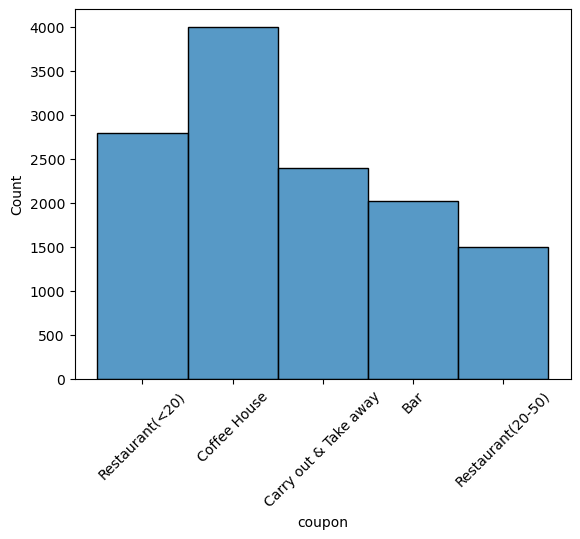

In [374]:
sns.histplot(data, x='coupon')
plt.xticks(rotation=45)


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

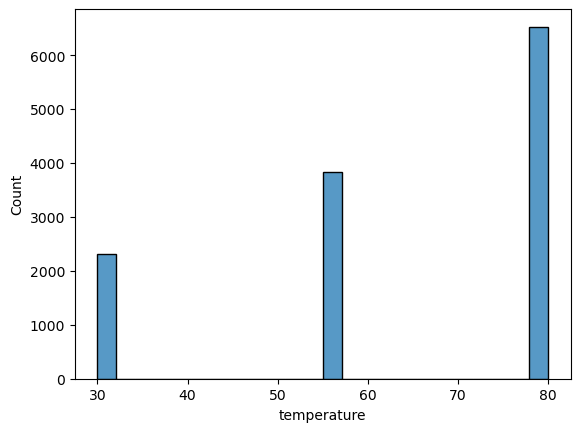

In [375]:
sns.histplot(data, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [376]:
df_barCoupons = data.query("coupon == 'Bar'")
df_barCoupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [377]:
nBarCoupons = df_barCoupons.shape[0]
print('Number who received bar coupons =', nBarCoupons)

df_barYes = df_barCoupons[df_barCoupons['Y'] == 1]
nBarYes = df_barYes.shape[0] 
print('Number who accepted bar coupons = ', nBarYes)

FractionYesBar = nBarYes/nBarCoupons
print('Percentage who accepted bar coupons =', FractionYesBar*100)


Number who received bar coupons = 2017
Number who accepted bar coupons =  827
Percentage who accepted bar coupons = 41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [378]:
#Drop rows with NaN in the 'Bar' column since relatively small number (107)
df_bar_clean = df_barCoupons.dropna(subset=['Bar'])

# Select rows for those who went to a bar > 3 times a month; call them frequent drinkers
# We use the boolean mask technique here since it's easy to select for the complementary criteria as well.
mask1 = df_bar_clean['Bar'].str.contains('gt8')
mask2 = df_bar_clean['Bar'].str.contains('4~8')
mask3 = mask1 | mask2

df_bar_frequent = df_bar_clean[mask3]
print('Frequent drinkers =', df_bar_frequent.shape[0])

# Infrequent drinkers (complementary set for frequent drinkers)
mask5 = ~mask3
df_bar_infreq = df_bar_clean[mask5]
print('Infrequent drinkers = ', df_bar_infreq.shape[0])
print('')

nFreqYes = df_bar_frequent[df_bar_frequent['Y'] == 1].shape[0]
print('Percent of frequent drinkers who accepted bar coupons =', nFreqYes/df_bar_frequent.shape[0])
nInfreqYes = df_bar_infreq[df_bar_infreq['Y'] == 1].shape[0]
print('Percent of infrequent drinkers who accepted bar coupons =', nInfreqYes/df_bar_infreq.shape[0])



Frequent drinkers = 199
Infrequent drinkers =  1797

Percent of frequent drinkers who accepted bar coupons = 0.7688442211055276
Percent of infrequent drinkers who accepted bar coupons = 0.37061769616026713


### Conclusion: 
Frequent drinkers are about twice as likely as infrequent drinkers to accept a bar coupon! <br>
The histogram below also shows this trend very clearly

Text(0.5, 0.95, 'Bar Coupon acceptance by bar visits per month')

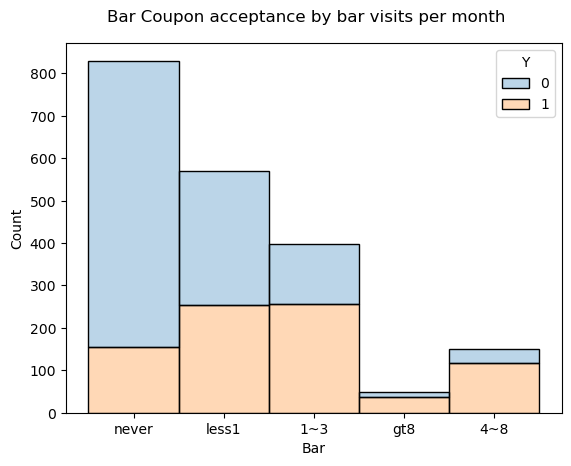

In [379]:
sns.histplot(df_bar_clean, x='Bar', hue='Y', alpha=0.3,  multiple="stack")
plt.suptitle('Bar Coupon acceptance by bar visits per month', y='0.95')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [380]:
# Restrict the data to the required criteria
sliceA = df_bar_clean.query("Bar != 'never' & Bar != 'less1'")
sliceB = sliceA.query("age > 25")
#print('sliceB value counts')
#print(sliceB.value_counts())

print('Number of people over age 25 who visit a bar more than once a month =', sliceB.shape[0])

#agg1 = slice2['Y'].agg(sum)
#print('agg1 =', agg1)

agg2 = sliceB.loc[sliceB['Y'] == 1]
print('Percentage who accepted the bar coupon = ', 100*agg2.shape[0]/sliceB.shape[0])

#agg3 = sliceB.loc[sliceB['Y'] == 0]
#print('Number who reejcted the bar coupon = ', agg3.shape)


Number of people over age 25 who visit a bar more than once a month = 420
Percentage who accepted the bar coupon =  69.52380952380952


### Conclusion:
People over age 25 who visit a bar more than once a month are significantly more likely to accept a bar coupon <br>
(69% vs 41% for the general population) <br>
We also note from the histogram below that more younger people accept bar coupons than older people, regardless of drinking habit. 

Text(0.5, 0.95, 'Bar Coupon acceptance by age')

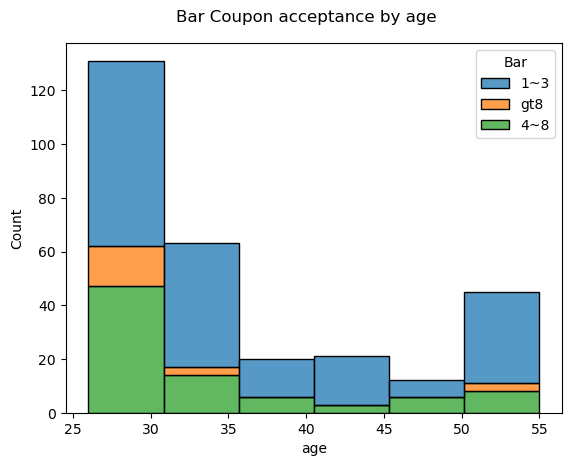

In [381]:
sns.histplot(agg2, x='age', hue='Bar',  multiple="stack", bins=6)
plt.suptitle('Bar Coupon acceptance by age', y='0.95')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [382]:
df_bar_clean['passanger'].value_counts()

passanger
Alone        1192
Friend(s)     331
Partner       270
Kid(s)        203
Name: count, dtype: int64

In [383]:
df_bar_clean['occupation'].value_counts()

occupation
Unemployed                                   298
Student                                      251
Computer & Mathematical                      228
Sales & Related                              178
Education&Training&Library                   137
Management                                   118
Office & Administrative Support              105
Arts Design Entertainment Sports & Media      91
Business & Financial                          88
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [384]:
# Select (actually select OUT) the required criteria
slice1 = df_bar_clean.query("Bar != 'never' & Bar != 'less1'")
slice2 = slice1.query("passanger != 'Kid(s)'")
slice3 = slice2.query("occupation != 'Farming Fishing & Forestry'")
print('Number who go to bars more than once a month, no kids as passengers and not farming, fishing, or forestry = ', len(slice3))

numYes1 = len(slice3[slice3['Y'] == 1])
print("Percentage of such drivers who accept bar coupons = ", 100*numYes1/len(slice3))

Number who go to bars more than once a month, no kids as passengers and not farming, fishing, or forestry =  551
Percentage of such drivers who accept bar coupons =  71.32486388384756


### Conclusion:
Drivers with such criteria accept bar coupons at a very high (perhaps even alarming) rate!

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [385]:
df_bar_clean['maritalStatus'].value_counts()

maritalStatus
Married partner      871
Single               655
Unmarried partner    376
Divorced              73
Widowed               21
Name: count, dtype: int64

In [386]:
slice4 = slice2.query("maritalStatus != 'Widowed'")
print('Number who go to bars more than once a month, passengers not kids, and were not widowed = ', len(slice4))
numYes2 = len(slice4[slice4['Y'] == 1])
print("Percentage who accepted bar coupons = ", 100*numYes2/len(slice4))

Number who go to bars more than once a month, passengers not kids, and were not widowed =  551
Percentage who accepted bar coupons =  71.32486388384756


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Conclusion:
Drivers who accept bar coupons tend to be younger, drink fairly frequently and have some disposable income (perhaps no kids, not working in forestry/farming so perhaps higher paying job)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### We explore the demographics of drivers who accept "fine dining" coupons, and also contrast this with those who accept fast food coupons.
We define "fine dining" restaurants to be those that offer coupons in the 20 to 50 dollar range, and "fast food" restaurants to be those that offer "Carry out and take away" coupons


## Observation: Is there an age bias in the data ?
We see from the age histogram below that <b>upwards of 70% of the recipients of all coupons were less than 40 years of age, </b> so the data possibly has an age bias built in.  Any age-related analysis will have to be viewed with caution!

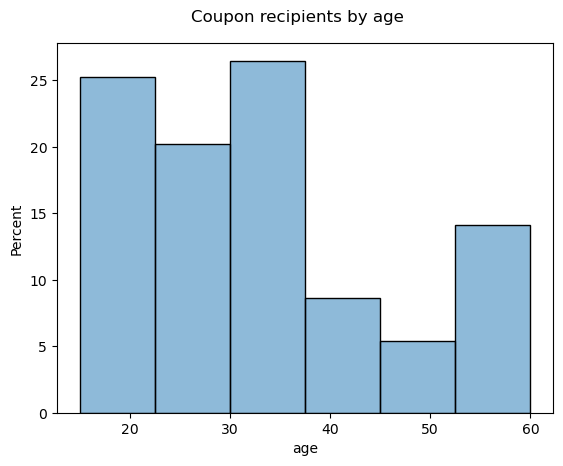

In [387]:
sns.histplot(data, x="age", alpha=0.5,  stat='percent', bins=6, binrange=[15, 60])
plt.suptitle('Coupon recipients by age', y='0.95')
plt.savefig("images\CouponRecipientsByAge.png")


### Data Transform:  Convert income to numeric values.
The income data conveniently comes in bins of width 12,500; we map each income bracket to its midpoint value 


In [388]:
print(data['income'].value_counts())
print('Num null =', data['income'].isna().sum())

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64
Num null = 0


In [389]:
def convert_income(str):
    if str == 'Less than $12500':
        return '6250'
    elif str == '$12500 - $24999':
        return '18750'
    elif str == '$25000 - $37499':
        return '31250'
    elif str == '$37500 - $49999':
        return '43750'
    elif str == '$50000 - $62499':
        return '56250'
    elif str == '$62500 - $74999':
        return '68750'
    elif str == '$75000 - $87499':
        return '81250'
    elif str == '$87500 - $99999':
        return '93750'
    else:
        # '$100000 or More'
        return '106250'
    
#convert income values to above strings... 
data['income'] = data['income'].apply(lambda x : convert_income(x))
#and then convert to numeric 
data['income'] = pd.to_numeric(data['income'])

print('Verify conversion to numeric is correct: check new value counts')
print(data['income'].value_counts())

Verify conversion to numeric is correct: check new value counts
income
31250     2013
18750     1831
43750     1805
106250    1736
56250     1659
6250      1042
93750      895
81250      857
68750      846
Name: count, dtype: int64


In [390]:
# List out the coupon types for easy reference
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [391]:
df_findDineCoup = data[data['coupon'] == 'Restaurant(20-50)']
df_fastFoodCoup = data[data['coupon'] == 'Carry out & Take away']
df_coffeeCoup = data[data['coupon'] == 'Coffee House']
print('Number who received fine dining coupons = ', len(df_fineDineCoup))
print('Number who received fast food coupons = ', len(df_fastFoodCoup))
print('Number who received coffee house coupons = ', len(df_coffeeCoup))

Number who received fine dining coupons =  1492
Number who received fast food coupons =  2393
Number who received coffee house coupons =  3996


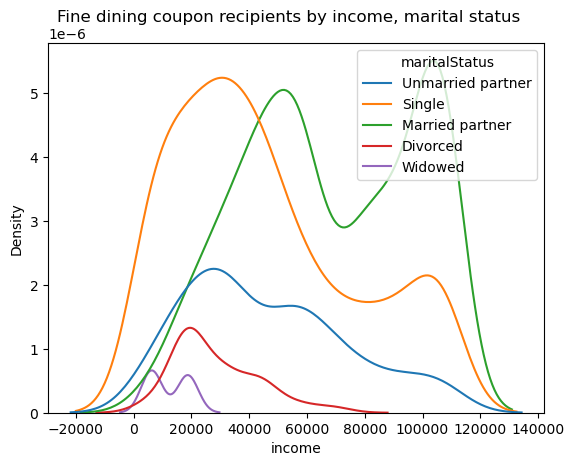

In [392]:
sns.kdeplot(df_fineDineCoup, x="income", hue='maritalStatus')
plt.suptitle('Fine dining coupon recipients by income, marital status', y='0.95')
plt.savefig("images\FineDining-all.png")

#### Observation: Distribution of fine dining coupons across marital status groups and incomes are similar, so no initial data bias.
See above plot.

In [393]:
# Select those who accepted the fine dining coupon
df_fineDine_yes = df_fineDineCoup[df_fineDineCoup['Y'] == 1]

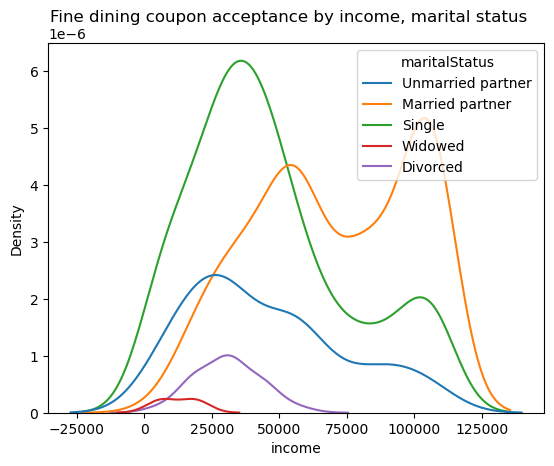

In [394]:
sns.kdeplot(df_fineDine_yes, x="income", hue='maritalStatus')
plt.suptitle('Fine dining coupon acceptance by income, marital status', y='0.95')
plt.savefig("images\FineDiningYes-marital.png")

#### Observation: Singles with lower income tend to accept fine dining coupons, as do wealthier married people
Perhaps low-income singles choose fine dining for a date, so a coupon is helpful? Interestingly, lower-income 'unmarried with partner' couples also accept fine dining coupons at a higher rate, bolstering the date hypothesis. Wealthier married couples accepting fine dining coupons is understandable.

In [395]:
print(data['expiration'].value_counts())
print(data['expiration'].isna().sum())

expiration
1d    7091
2h    5593
Name: count, dtype: int64
0


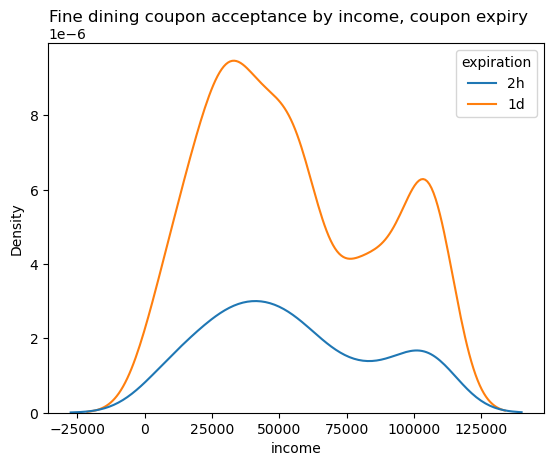

In [396]:
sns.kdeplot(df_fineDine_yes, x="income", hue='expiration', hue_order = ['2h', '1d'])
plt.suptitle('Fine dining coupon acceptance by income, coupon expiry', y='0.95')
plt.savefig("images\FineDiningYes-expiry.png")

#### Observation: Quick-expiring (2-hour) fine dining coupons were not accepted as much as longer expiry (1 day) coupons.
This is understandable - fine dining requires planning and is probably not done at the spur of the moment.

#### Let us compare fine dining behavior with fast-food behavior

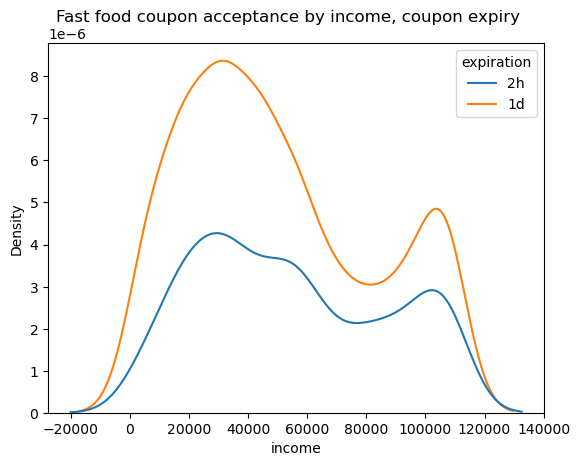

In [397]:
# Select those who accepted the fast-food coupon
df_fastFood_yes = df_fastFoodCoup[df_fastFoodCoup['Y'] == 1]
sns.kdeplot(df_fastFood_yes, x="income", hue='expiration', hue_order = ['2h', '1d'])
plt.suptitle('Fast food coupon acceptance by income, coupon expiry', y='0.95')
plt.savefig("images\FastFoodYes-expiry.png")

#### Observation: While longer-expiring coupons were accepted more than quick expiry ones, the difference was not as marked as with fine dining.
Since fast food is often consumed on the go and on a contingency basis, a timely coupon will still be acceptable even if it expires soon. <br>
This can be seen even more clearly in the boxplots below, where we see that for fine dining, long and quick expiry coupon acceptance are similar, but for fast food, quick expiry coupons are redeemed more.

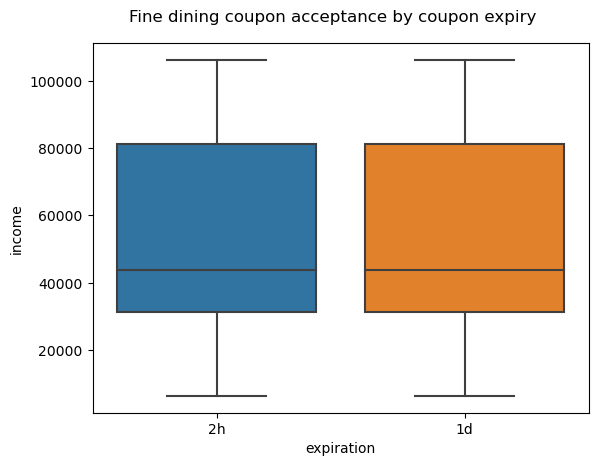

In [398]:
box_colors = {'2h': sns.color_palette()[0], '1d': sns.color_palette()[1]}
sns.boxplot(df_fineDine_yes, y='income', x='expiration', order=['2h', '1d'], palette=box_colors)
plt.suptitle('Fine dining coupon acceptance by coupon expiry', y='0.95')
plt.savefig("images\FineDiningYes-expiry-box.png")

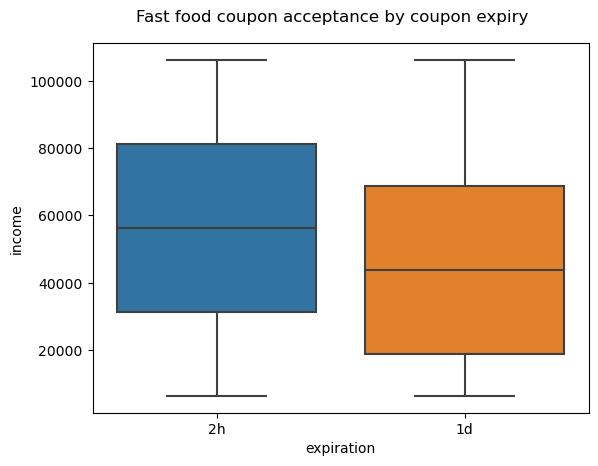

In [399]:
sns.boxplot(df_fastFood_yes, y='income', x='expiration', order=['2h', '1d'], palette=box_colors)
plt.suptitle('Fast food coupon acceptance by coupon expiry', y='0.95')
plt.savefig("images\FastFoodYes-expiry-box.png")

### Conclusions
We exlored the demographics of drivers who accepted "fine dining" coupons, and also contrasted this with those who accepted fast food coupons. <br/>
- There is a possible age bias in the dataset (a quick look indicates that coupons are being sent to a younger audience)
- Distribution of fine dining coupons across marital status groups and incomes are similar, so there is no initial data bias.
- Lower-income singles and lower-income unmarried-with-partners tend to accept fine dining coupons, as do wealthier married people. We hypothesize that singles/unmarried might use the fine dining coupons for a dinner date. This could be of interest to the marketing department.
- Fast-expiring (2-hour) _fine dining_ coupons were not accepted as much as longer expiry (1 day) coupons. Possibily, fine dining requires more planning, making a fast-expiring coupon less attractive.
- By contrast, in the case of _fast food_ coupons, while longer-expiring ones were accepted more than fast-expiry ones, the difference was not as marked as with fine dining.

### Further exploration:
- It will be worth exploring if there actually is an age bias in the dataset as mentioned earlier.
- It will be very intersting to analyze how accepetance rate depends on the face value of the coupon. From a marketing point of view, is there a sweet spot where acceptance rate is high but the face value is not too high for the vendor to make a profit?
- The maximum number of coupons were given out by coffee houses. It will be interesting to do a deep dive into what drives acceptance of those coupons.
